## Preprocessing and EDA

## Importing Libraries 

In [1]:
# basic functionalities
import os
import sys
import datetime
import itertools
import math

# data transforamtion and manipulation
import pandas as pd
import numpy as np
from math import sqrt

# prevent crazy long numpy prints
np.set_printoptions(precision=4, suppress=True)

# prevent crazy long pandas prints
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot styling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# set params
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

# statistical modeling libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# ML basic library
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

#Img:
from IPython.display import Image


/var/folders/yp/wh4rvlfs5r5b3n1mdqkp6ypm0000gn/T/ipykernel_3873/1104968003.py:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Importing data


In [2]:
datapath_file = './105_days.parquet'
df = pd.read_parquet(datapath_file)


In [3]:
df.head()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
0,2023-01-01 00:00:00,66116.00000,67088.31250,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
1,2023-01-01 00:00:01,66561.00000,68342.31250,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2,2023-01-01 00:00:02,66107.00000,67583.31250,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
3,2023-01-01 00:00:03,66309.00000,67101.31250,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
4,2023-01-01 00:00:04,66309.00000,65259.31250,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [4]:
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [5]:
df['ActivePower'] /= 1000
df['ReactivePower'] /= 1000
df['wahing_machine'] /= 1000
df['dishwasher'] /= 1000
df['oven'] /= 1000


# Data Preprocessing and Exploratory Data Analysis (EDA)

## __Converting to datetime format and sort:__

In [6]:
# convert:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# sort:
df = df.sort_values(by=['DateTime'], axis=0, ascending=True)
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [7]:
df.shape


(9072000, 16)

In [8]:
df.head()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
0,2023-01-01 00:00:00,66.11600,67.08831,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
1,2023-01-01 00:00:01,66.56100,68.34231,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2,2023-01-01 00:00:02,66.10700,67.58331,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
3,2023-01-01 00:00:03,66.30900,67.10131,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
4,2023-01-01 00:00:04,66.30900,65.25931,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [9]:
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [10]:
df.describe()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
count,9072000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000
mean,2023-02-22 11:59:59.499976448,259.92478,72.56988,234.48259,839.26380,-4.40645,-1209.78415,26.10631,-84.17444,-13.41147,-21.86635,-7.03521,-11.00812,13.72150,35.22077,12.01732
min,2023-01-01 00:00:00,0.00000,-763.30775,226.00000,215.00000,-4074.00000,-28129.00000,-695.00000,-1070.00000,-223.00000,-264.00000,-150.00000,-151.00000,0.00000,0.00000,0.00000
25%,2023-01-27 05:59:59.750000128,72.84600,55.77600,233.00000,305.00000,-91.00000,-965.00000,15.00000,-100.00000,-17.00000,-26.00000,-10.00000,-16.00000,0.00000,0.00000,0.00000
50%,2023-02-22 11:59:59.500000,132.47700,66.45431,234.00000,560.00000,10.00000,-611.00000,21.00000,-62.00000,-14.00000,-19.00000,-6.00000,-10.00000,0.00000,0.00000,0.00000
75%,2023-03-20 17:59:59.249999872,208.37100,79.76900,236.00000,751.00000,46.00000,-331.00000,36.00000,-48.00000,-9.00000,-13.00000,-3.00000,-6.00000,0.00000,0.00000,0.00000
max,2023-04-15 23:59:59,5962.83200,1590.07625,240.00000,18942.00000,1208.00000,81.00000,487.00000,416.00000,121.00000,183.00000,94.00000,70.00000,1924.37800,2026.09100,1426.67300
std,NaN,460.49216,42.52092,1.48292,1167.00240,157.41971,2169.44597,31.10213,60.16534,12.56519,16.32026,7.48746,8.79185,140.09371,257.92428,125.18398


## __Removal duplicates__:

In [11]:
df.drop_duplicates(subset='DateTime', keep='last', inplace=True)


In [12]:
print('Time period start: {}\nTime period end: {}'.format(df.DateTime.min(),df.DateTime.max()))


Time period start: 2023-01-01 00:00:00
Time period end: 2023-04-15 23:59:59


## __Setting index as the datetime column for easier manipulations:__

In [13]:
df = df.set_index('DateTime')
print(f'df.index.freq is: {df.index.freq}')


df.index.freq is: None


__Note:__
- datetime index's frequency is None => there are some missing data points somewhere (otherwise Python could deduce it) => remove missing 

## __Find and Fill Missing datetime Instances__

In [14]:
# ideal range: without missing data
date_range = pd.date_range(start=min(df.index), end=max(df.index), freq='S')


In [15]:
min(df.index), max(df.index),


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-04-15 23:59:59'))

In [16]:
print(f'The difference in length between the ideal date range and our dataset is: {(len(date_range)-len(df))}:')


The difference in length between the ideal date range and our dataset is: 0:


In [17]:
print("missing data in:", date_range.difference(df.index))


missing data in: DatetimeIndex([], dtype='datetime64[ns]', freq='s')


In [18]:
#Reindex the dataset and then fill data:

#Create null values in missing data:
df = df.reindex(date_range)

#Filling  missing  with linear interpolation between existing data points
for col in df.columns:
    df[col].interpolate(method='linear', inplace=True)

# now we have a neatly continuous datetime index
print(f'The df.index.freq is now: {df.index.freq}, => we no have missing instances')


The df.index.freq is now: <Second>, => we no have missing instances


In [20]:
df.head()


,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
2023-01-01 00:00:00,66.11600,67.08831,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
2023-01-01 00:00:01,66.56100,68.34231,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2023-01-01 00:00:02,66.10700,67.58331,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
2023-01-01 00:00:03,66.30900,67.10131,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
2023-01-01 00:00:04,66.30900,65.25931,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [21]:
df.shape


(9072000, 15)

## Extracting Time Features

- We split datetime into its different __features__ => to find patterns for different groups.

In [22]:
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.dayofyear//7
df['dayofmonth'] = df.index.day # Day of Month
df['date'] = df.index.date

# let's add the season number
df['season'] = df['month'].apply(lambda month_number: (month_number%12 + 3)//3)


In [23]:
df.head()


,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-01-01 00:00:00,66.11600,67.08831,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:01,66.56100,68.34231,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:02,66.10700,67.58331,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:03,66.30900,67.10131,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:04,66.30900,65.25931,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1


In [24]:
df.tail()


,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-04-15 23:59:55,138.89600,140.49139,235.00000,597.00000,-123.00000,-642.00000,17.00000,-41.00000,-17.00000,-11.00000,-12.00000,-7.00000,0.00000,0.00000,0.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:56,139.57400,139.00139,235.00000,599.00000,-126.00000,-642.00000,19.00000,-42.00000,-16.00000,-11.00000,-6.00000,0.00000,0.00000,0.00000,0.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:57,138.99700,140.66539,236.00000,595.00000,-127.00000,-639.00000,16.00000,-42.00000,-17.00000,-10.00000,-4.00000,-7.00000,0.00000,0.00000,0.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:58,141.10800,139.17039,236.00000,603.00000,-125.00000,-649.00000,19.00000,-44.00000,-17.00000,-12.00000,-12.00000,-2.00000,0.00000,0.00000,0.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:59,137.68200,142.25639,235.00000,593.00000,-124.00000,-639.00000,18.00000,-43.00000,-16.00000,-11.00000,-2.00000,-3.00000,0.00000,0.00000,0.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt


In [26]:
gr_hour_season = df.groupby(['hour', 'season']).agg({'ActivePower':'median'})
gr_hour_season.head()


ActivePower
hour season             
0    1         110.22400
     2         114.05100
1    1          66.42000
     2          66.28500
2    1          65.08800

In [27]:
gr_dayofweek_season = df.groupby(['dayofweek', 'season'], as_index=False).agg({'ActivePower':'median'})
gr_dayofweek_season.head()


,dayofweek,season,ActivePower
0,0,1,132.01750
1,0,2,129.06300
2,1,1,134.86100
3,1,2,132.32500
4,2,1,132.14000


In [28]:
gr_dayofweek_season['dayofweek_name'] = gr_dayofweek_season.dayofweek.map({ 0:'lunedi',
                                                                            1:'martedi',
                                                                            2:'mercoledi',
                                                                            3:'giovedi',
                                                                            4:'venerdi',
                                                                            5:'sabato',
                                                                            6:'domenica',
                                                                         })


In [29]:
gr_dayofweek_season.head()


,dayofweek,season,ActivePower,dayofweek_name
0,0,1,132.01750,lunedi
1,0,2,129.06300,lunedi
2,1,1,134.86100,martedi
3,1,2,132.32500,martedi
4,2,1,132.14000,mercoledi


## Unbalanced data

In [30]:
y_wm = (df['wahing_machine']>0).astype(int)
y_dw = (df['dishwasher']>0).astype(int)
y_ow = (df['oven']>0).astype(int)


In [31]:
drop_cols = ['wahing_machine', 'dishwasher', 'oven', 'date']
X =  df.drop(drop_cols, axis=1)


In [32]:
X.dtypes


ActivePower            float64
ReactivePower          float64
Voltage                float64
Current                float64
harmonic1_Real         float64
harmonic1_Imaginary    float64
harmonic3_Real         float64
harmonic3_Imaginary    float64
harmonic5_Real         float64
harmonic5_Imaginary    float64
harmonic7_Real         float64
harmonic7_Imaginary    float64
dayofweek                int32
dayofyear                int32
year                     int32
month                    int32
quarter                  int32
hour                     int32
weekday                  int32
weekofyear               int32
dayofmonth               int32
season                   int64
dtype: object

In [33]:
X.describe()


,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,season
count,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000
mean,259.92478,72.56988,234.48259,839.26380,-4.40645,-1209.78415,26.10631,-84.17444,-13.41147,-21.86635,-7.03521,-11.00812,3.00000,53.00000,2023.00000,2.28571,1.14286,11.50000,3.00000,7.14286,14.45714,1.43810
std,460.49216,42.52092,1.48292,1167.00240,157.41971,2169.44597,31.10213,60.16534,12.56519,16.32026,7.48746,8.79185,2.00000,30.30952,0.00000,1.03936,0.34993,6.92219,2.00000,4.33464,8.64102,0.49615
min,0.00000,-763.30775,226.00000,215.00000,-4074.00000,-28129.00000,-695.00000,-1070.00000,-223.00000,-264.00000,-150.00000,-151.00000,0.00000,1.00000,2023.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
25%,72.84600,55.77600,233.00000,305.00000,-91.00000,-965.00000,15.00000,-100.00000,-17.00000,-26.00000,-10.00000,-16.00000,1.00000,27.00000,2023.00000,1.00000,1.00000,5.75000,1.00000,3.00000,7.00000,1.00000
50%,132.47700,66.45431,234.00000,560.00000,10.00000,-611.00000,21.00000,-62.00000,-14.00000,-19.00000,-6.00000,-10.00000,3.00000,53.00000,2023.00000,2.00000,1.00000,11.50000,3.00000,7.00000,14.00000,1.00000
75%,208.37100,79.76900,236.00000,751.00000,46.00000,-331.00000,36.00000,-48.00000,-9.00000,-13.00000,-3.00000,-6.00000,5.00000,79.00000,2023.00000,3.00000,1.00000,17.25000,5.00000,11.00000,22.00000,2.00000
max,5962.83200,1590.07625,240.00000,18942.00000,1208.00000,81.00000,487.00000,416.00000,121.00000,183.00000,94.00000,70.00000,6.00000,105.00000,2023.00000,4.00000,2.00000,23.00000,6.00000,15.00000,31.00000,2.00000


In [34]:
y_wm.head()

2023-01-01 00:00:00    0
2023-01-01 00:00:01    0
2023-01-01 00:00:02    0
2023-01-01 00:00:03    0
2023-01-01 00:00:04    0
Freq: s, Name: wahing_machine, dtype: int64

In [35]:
y_wm.value_counts()


wahing_machine
0    8774256
1     297744
Name: count, dtype: int64

In [36]:
y_dw.value_counts()


dishwasher
0    8830898
1     241102
Name: count, dtype: int64

In [37]:
y_ow.value_counts()


oven
0    8960338
1     111662
Name: count, dtype: int64

In [38]:
y_wm_month = pd.concat([y_wm, df['month']], axis=1)

In [39]:
print(y_wm_month.groupby(['month', 'wahing_machine']).size().unstack(fill_value=0))

wahing_machine        0      1
month                         
1               2583183  95217
2               2356011  63189
3               2580667  97733
4               1254395  41605


In [40]:
y_dw_month = pd.concat([y_dw, df['month']], axis=1)

In [41]:
print(y_dw_month.groupby(['month', 'dishwasher']).size().unstack(fill_value=0))

dishwasher        0      1
month                     
1           2618104  60296
2           2348096  71104
3           2600666  77734
4           1264032  31968


In [42]:
y_ow_month = pd.concat([y_ow, df['month']], axis=1)

In [43]:
print(y_ow_month.groupby(['month', 'oven']).size().unstack(fill_value=0))

oven         0      1
month                
1      2643219  35181
2      2388382  30818
3      2648033  30367
4      1280704  15296


In [44]:
print(y_ow_month.groupby(['month', 'oven']).size().unstack(fill_value=0))

oven         0      1
month                
1      2643219  35181
2      2388382  30818
3      2648033  30367
4      1280704  15296


In [45]:
Y = pd.concat([y_wm, y_dw, y_ow], axis=1)


In [46]:
Y.head()


,wahing_machine,dishwasher,oven
2023-01-01 00:00:00,0,0,0
2023-01-01 00:00:01,0,0,0
2023-01-01 00:00:02,0,0,0
2023-01-01 00:00:03,0,0,0
2023-01-01 00:00:04,0,0,0


<Axes: xlabel='wahing_machine,dishwasher,oven'>

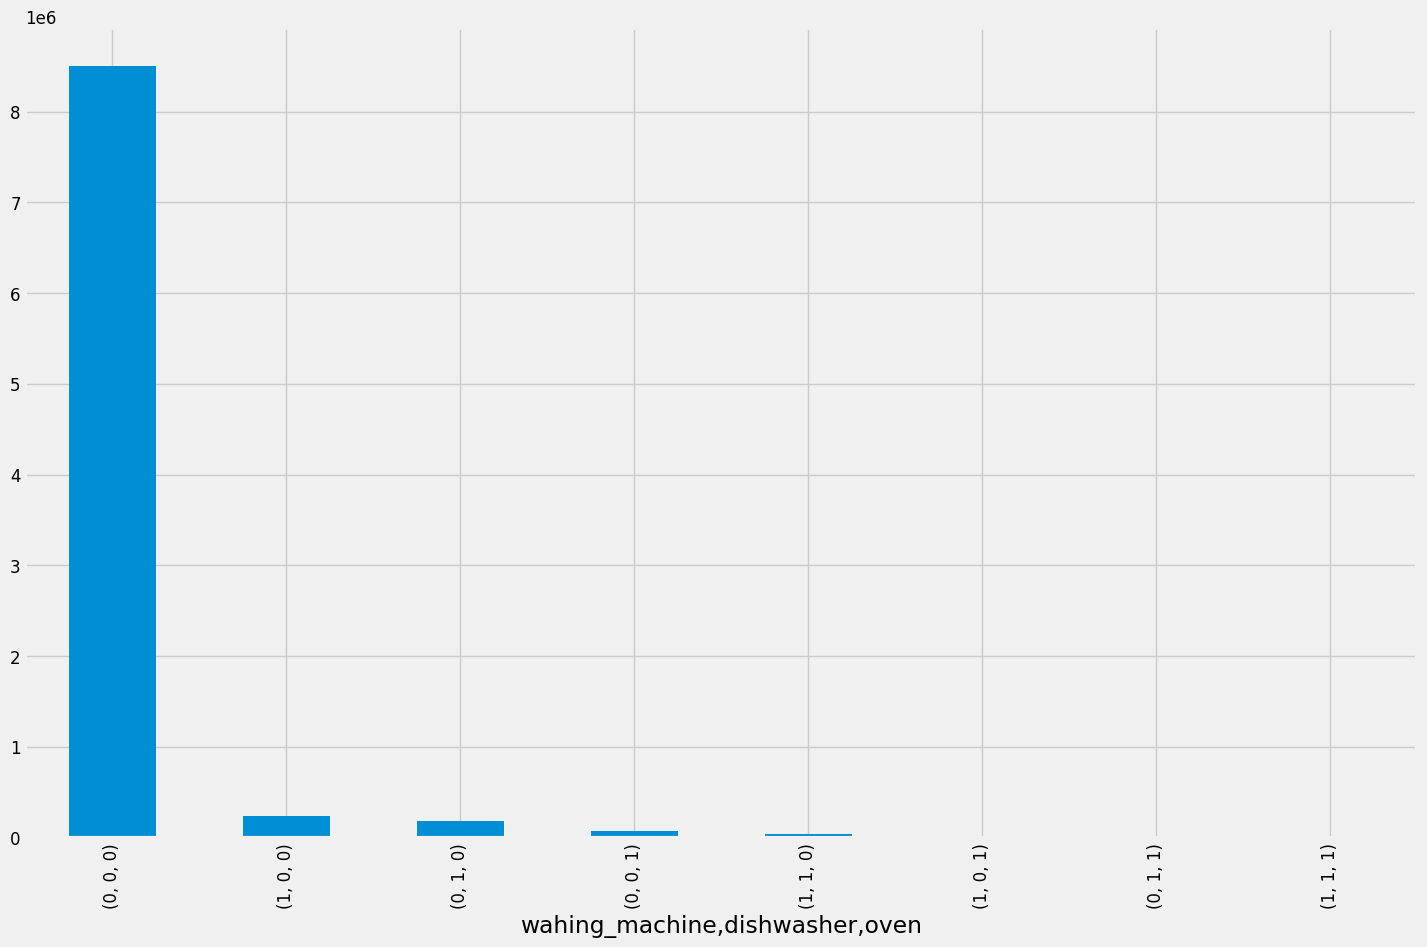

In [47]:
Y.value_counts().plot(kind='bar')


In [48]:
Y['label'] = Y[['wahing_machine','dishwasher','oven']].apply(lambda row: int(''.join(map(str, row)), 2), axis=1)


In [49]:
print(Y[Y['label']==4])


                     wahing_machine  dishwasher  oven  label
2023-01-02 18:04:27               1           0     0      4
2023-01-02 18:04:28               1           0     0      4
2023-01-02 18:04:29               1           0     0      4
2023-01-02 18:04:30               1           0     0      4
2023-01-02 18:04:31               1           0     0      4
...                             ...         ...   ...    ...
2023-04-15 08:36:14               1           0     0      4
2023-04-15 08:36:27               1           0     0      4
2023-04-15 08:36:28               1           0     0      4
2023-04-15 08:36:29               1           0     0      4
2023-04-15 08:36:34               1           0     0      4

[238119 rows x 4 columns]


In [50]:
Y['label_str'] = Y['label'].map({0:'AO',
                                1:'OW',
                                2:'DW',
                                3:'DW_OW',
                                4:'WM',
                                5:'WM_OW',
                                6:'WM_DW',
                                7:'WM_DW_OW',
                                })
Y['label_str']


2023-01-01 00:00:00    AO
2023-01-01 00:00:01    AO
2023-01-01 00:00:02    AO
2023-01-01 00:00:03    AO
2023-01-01 00:00:04    AO
                       ..
2023-04-15 23:59:55    AO
2023-04-15 23:59:56    AO
2023-04-15 23:59:57    AO
2023-04-15 23:59:58    AO
2023-04-15 23:59:59    AO
Freq: s, Name: label_str, Length: 9072000, dtype: object

In [51]:
y_analysis = pd.concat([Y, df['ActivePower'], df['ReactivePower'], df['harmonic1_Real'], df['harmonic1_Imaginary'], df['harmonic3_Real'], df['harmonic3_Imaginary'], df['harmonic5_Real'], df['harmonic5_Imaginary'], df['harmonic7_Real'], df['harmonic7_Imaginary'], df['Voltage'], df['Current']], axis=1)

## Add a new features

### Instant Power

In [52]:
y_analysis['instant_power'] = y_analysis['ActivePower'] * y_analysis['ReactivePower']


### Apparent Power

In [53]:
y_analysis['ApparentPower'] = (y_analysis['ActivePower']**2 + y_analysis['ReactivePower']**2)**0.5

### Power Factor

In [54]:
y_analysis['PowerFactor'] = np.cos(np.arccos(y_analysis['ActivePower'] / y_analysis['ApparentPower']))

### Total Harmonic Distortion (THD)

In [55]:
harmonics_columns = ['harmonic1_Real', 'harmonic1_Imaginary', 'harmonic3_Real', 'harmonic3_Imaginary',
                     'harmonic5_Real', 'harmonic5_Imaginary', 'harmonic7_Real', 'harmonic7_Imaginary']

harmonics_square_sum = np.sum(y_analysis[harmonics_columns] ** 2, axis=1)
y_analysis['THD'] = np.sqrt(harmonics_square_sum) / y_analysis['ActivePower']

### Harmonic Distortion Index

In [56]:
y_analysis['HarmonicDistortionIndex'] = np.sum(np.sqrt(y_analysis[harmonics_columns] ** 2), axis=1)

### Power Fluctuation

In [57]:
y_analysis['Power Fluctuations'] = y_analysis['ActivePower'].diff() / y_analysis.index.to_series().diff().dt.total_seconds()

# Fill NaN values in the first row (resulting from the diff operation)
y_analysis['Power Fluctuations'].iloc[0] = 0.0


### Resistance

In [58]:
y_analysis['Resistance'] = y_analysis['Voltage'] / y_analysis['Current']

In [59]:
y_analysis.head()

,wahing_machine,dishwasher,oven,label,label_str,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,0,0,0,0,AO,66.11600,67.08831,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,237.00000,279.00000,4435.61087,94.19218,0.70193,4.64523,439.00000,0.00000,0.84946
2023-01-01 00:00:01,0,0,0,0,AO,66.56100,68.34231,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,237.00000,281.00000,4548.93266,95.39936,0.69771,4.64979,449.00000,0.44500,0.84342
2023-01-01 00:00:02,0,0,0,0,AO,66.10700,67.58331,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,237.00000,279.00000,4467.73004,94.53909,0.69926,4.66562,449.00000,-0.45400,0.84946
2023-01-01 00:00:03,0,0,0,0,AO,66.30900,67.10131,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,236.00000,281.00000,4449.42093,94.33700,0.70289,4.58579,434.00000,0.20200,0.83986
2023-01-01 00:00:04,0,0,0,0,AO,66.30900,65.25931,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,236.00000,281.00000,4327.27975,93.03581,0.71273,4.63364,442.00000,0.00000,0.83986


In [60]:
# List of column names to drop
columns_to_drop = ['wahing_machine', 'dishwasher', 'oven', 'label', 'label_str']

# Dropping columns
x_analysis = y_analysis.drop(columns=columns_to_drop)

In [61]:
x_analysis.head()

,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,66.11600,67.08831,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,237.00000,279.00000,4435.61087,94.19218,0.70193,4.64523,439.00000,0.00000,0.84946
2023-01-01 00:00:01,66.56100,68.34231,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,237.00000,281.00000,4548.93266,95.39936,0.69771,4.64979,449.00000,0.44500,0.84342
2023-01-01 00:00:02,66.10700,67.58331,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,237.00000,279.00000,4467.73004,94.53909,0.69926,4.66562,449.00000,-0.45400,0.84946
2023-01-01 00:00:03,66.30900,67.10131,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,236.00000,281.00000,4449.42093,94.33700,0.70289,4.58579,434.00000,0.20200,0.83986
2023-01-01 00:00:04,66.30900,65.25931,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,236.00000,281.00000,4327.27975,93.03581,0.71273,4.63364,442.00000,0.00000,0.83986


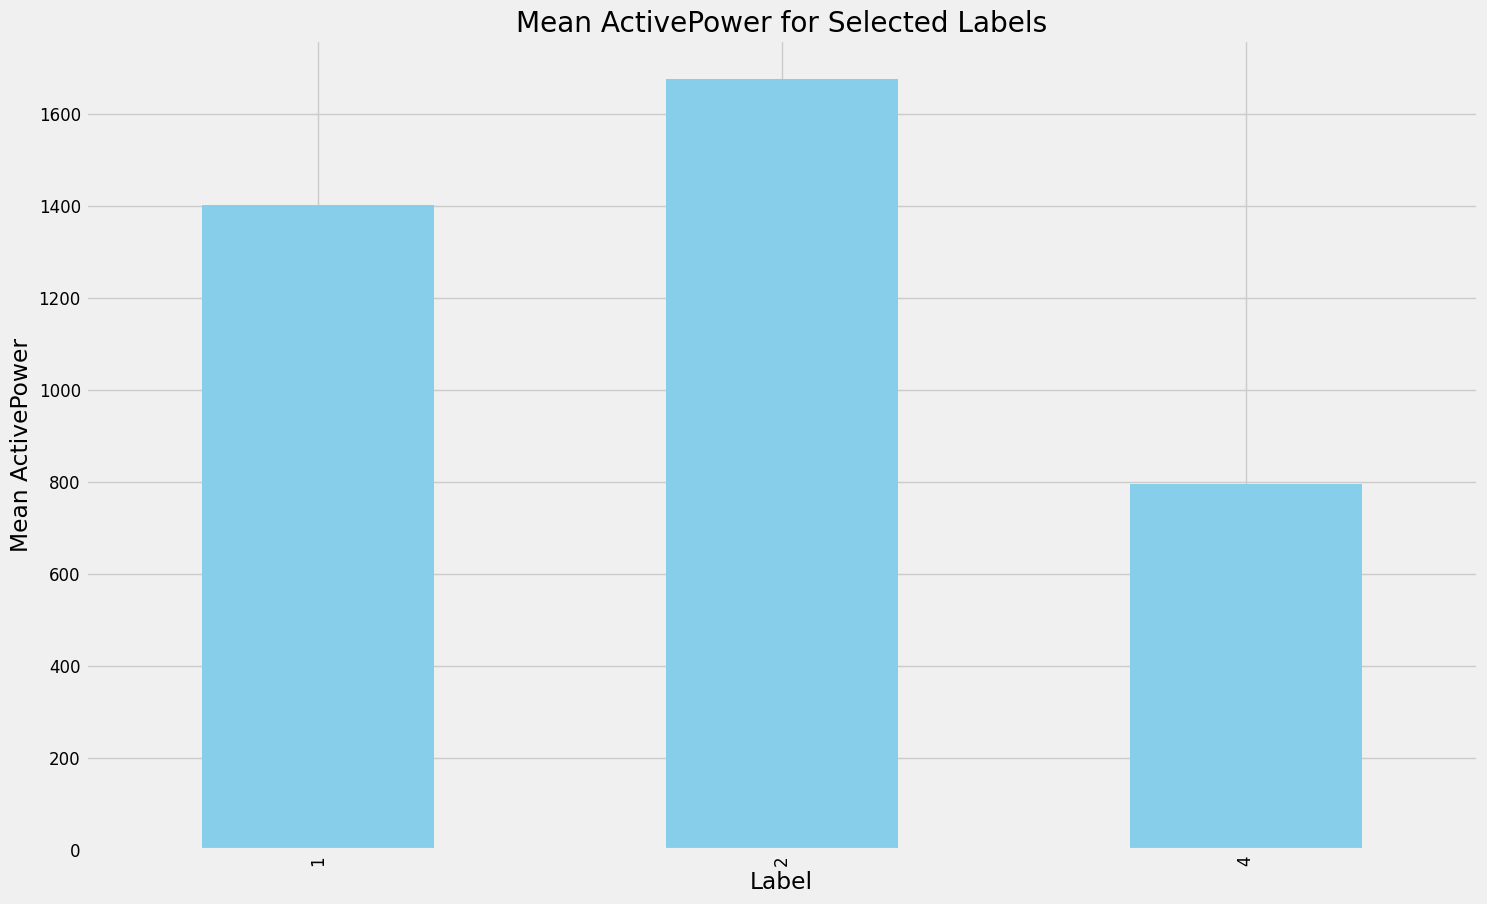

In [62]:
# Assuming your DataFrame is named df
labels_to_visualize = [1, 2, 4]

# Filter the DataFrame for the specified labels
filtered_df = y_analysis[y_analysis['label'].isin(labels_to_visualize)]

# Group by 'label' and calculate the mean of 'ActivePower'
mean_by_label = filtered_df.groupby('label')['ActivePower'].mean()

# Plot the mean values
mean_by_label.plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Mean ActivePower')
plt.title('Mean ActivePower for Selected Labels')
plt.show()

In [63]:
labels_to_describe = [1, 2, 3, 4, 5, 6, 7]

# Iterate through each label and apply describe
for label in labels_to_describe:
    label_df = y_analysis[y_analysis['label'] == label]
    label_description = label_df.describe()
    print(f"Description for Label {label}:\n{label_description}\n")

Description for Label 1:
       wahing_machine  dishwasher        oven       label  ActivePower  ReactivePower  harmonic1_Real  harmonic1_Imaginary  harmonic3_Real  harmonic3_Imaginary  harmonic5_Real  harmonic5_Imaginary  harmonic7_Real  harmonic7_Imaginary     Voltage     Current  instant_power  ApparentPower  PowerFactor         THD  HarmonicDistortionIndex  Power Fluctuations  Resistance
count     69501.00000 69501.00000 69501.00000 69501.00000  69501.00000    69501.00000     69501.00000          69501.00000     69501.00000          69501.00000     69501.00000          69501.00000     69501.00000          69501.00000 69501.00000 69501.00000    69501.00000    69501.00000  69501.00000 69501.00000              69501.00000         69501.00000 69501.00000
mean          0.00000     0.00000     1.00000     1.00000   1401.71347      156.21927      -266.39624          -6605.89920        62.34542           -147.22236       -11.23843            -34.14931       -12.85173            -16.19421  

In [64]:
y_analysis.head()

,wahing_machine,dishwasher,oven,label,label_str,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,0,0,0,0,AO,66.11600,67.08831,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,237.00000,279.00000,4435.61087,94.19218,0.70193,4.64523,439.00000,0.00000,0.84946
2023-01-01 00:00:01,0,0,0,0,AO,66.56100,68.34231,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,237.00000,281.00000,4548.93266,95.39936,0.69771,4.64979,449.00000,0.44500,0.84342
2023-01-01 00:00:02,0,0,0,0,AO,66.10700,67.58331,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,237.00000,279.00000,4467.73004,94.53909,0.69926,4.66562,449.00000,-0.45400,0.84946
2023-01-01 00:00:03,0,0,0,0,AO,66.30900,67.10131,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,236.00000,281.00000,4449.42093,94.33700,0.70289,4.58579,434.00000,0.20200,0.83986
2023-01-01 00:00:04,0,0,0,0,AO,66.30900,65.25931,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,236.00000,281.00000,4327.27975,93.03581,0.71273,4.63364,442.00000,0.00000,0.83986


In [65]:
y_analysis.dtypes

wahing_machine               int64
dishwasher                   int64
oven                         int64
label                        int64
label_str                   object
ActivePower                float64
ReactivePower              float64
harmonic1_Real             float64
harmonic1_Imaginary        float64
harmonic3_Real             float64
harmonic3_Imaginary        float64
harmonic5_Real             float64
harmonic5_Imaginary        float64
harmonic7_Real             float64
harmonic7_Imaginary        float64
Voltage                    float64
Current                    float64
instant_power              float64
ApparentPower              float64
PowerFactor                float64
THD                        float64
HarmonicDistortionIndex    float64
Power Fluctuations         float64
Resistance                 float64
dtype: object

In [66]:
y = Y['label']


In [67]:
df.head()

,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-01-01 00:00:00,66.11600,67.08831,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:01,66.56100,68.34231,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:02,66.10700,67.58331,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:03,66.30900,67.10131,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:04,66.30900,65.25931,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1


In [69]:
x_analysis = pd.concat([x_analysis, df['dayofweek'], df['dayofyear'], df['month'], df['hour'], df['weekday'], df['weekofyear'], df['dayofmonth'], df['season']], axis=1)

In [70]:
x_analysis.head()

,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance,dayofweek,dayofyear,month,hour,weekday,weekofyear,dayofmonth,season
2023-01-01 00:00:00,66.11600,67.08831,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,237.00000,279.00000,4435.61087,94.19218,0.70193,4.64523,439.00000,0.00000,0.84946,6,1,1,0,6,0,1,1
2023-01-01 00:00:01,66.56100,68.34231,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,237.00000,281.00000,4548.93266,95.39936,0.69771,4.64979,449.00000,0.44500,0.84342,6,1,1,0,6,0,1,1
2023-01-01 00:00:02,66.10700,67.58331,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,237.00000,279.00000,4467.73004,94.53909,0.69926,4.66562,449.00000,-0.45400,0.84946,6,1,1,0,6,0,1,1
2023-01-01 00:00:03,66.30900,67.10131,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,236.00000,281.00000,4449.42093,94.33700,0.70289,4.58579,434.00000,0.20200,0.83986,6,1,1,0,6,0,1,1
2023-01-01 00:00:04,66.30900,65.25931,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,236.00000,281.00000,4327.27975,93.03581,0.71273,4.63364,442.00000,0.00000,0.83986,6,1,1,0,6,0,1,1


In [72]:
column_name = 'THD'

# Calculate the median of the column (excluding infinite values)
median_value = np.mean(x_analysis.replace([np.inf, -np.inf], np.nan)[column_name])

# Replace infinite values with the median in the specified column
x_analysis[column_name] = x_analysis[column_name].replace([np.inf, -np.inf, np.nan], median_value)

# Identify rows with infinite values in the specified column
rows_with_inf = x_analysis.index[np.isinf(x_analysis[column_name])]

# Print the rows containing infinite values for the specified column
print("Rows with infinite values in column '{}':".format(column_name))
print(rows_with_inf)

Rows with infinite values in column 'THD':
DatetimeIndex([], dtype='datetime64[ns]', freq='s')


In [73]:
X = StandardScaler().fit_transform(x_analysis)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=25)


In [75]:
target_names = ['AO','OW','DW','DW_OW','WM','WM_OW','WM_DW','WM_DW_OW']


## Random Forest Algorithm

In [76]:
class_weights = {0: 0.2, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 3.0}

# Initialize RandomForestClassifier with custom class weights
clf_frst = RandomForestClassifier(n_estimators=500, class_weight=class_weights, random_state=0)

scores = cross_val_score(clf_frst, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [77]:
clf_frst.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0,
                                     5: 1.0, 6: 1.0, 7: 3.0},
                       n_estimators=500, random_state=0)

In [78]:
print(classification_report(y,clf_frst.predict(X), target_names=target_names))

              precision    recall  f1-score   support

          AO       1.00      1.00      1.00   8501970
          OW       1.00      1.00      1.00     69501
          DW       1.00      1.00      1.00    182445
       DW_OW       1.00      1.00      1.00     20340
          WM       0.99      0.99      0.99    238119
       WM_OW       1.00      1.00      1.00     21308
       WM_DW       1.00      1.00      1.00     37804
    WM_DW_OW       1.00      1.00      1.00       513

    accuracy                           1.00   9072000
   macro avg       1.00      1.00      1.00   9072000
weighted avg       1.00      1.00      1.00   9072000



In [79]:
print(classification_report(y_test,clf_frst.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          AO       1.00      1.00      1.00   2550591
          OW       1.00      1.00      1.00     20850
          DW       1.00      1.00      1.00     54734
       DW_OW       1.00      1.00      1.00      6102
          WM       0.98      0.98      0.98     71436
       WM_OW       1.00      1.00      1.00      6392
       WM_DW       1.00      1.00      1.00     11341
    WM_DW_OW       1.00      1.00      1.00       154

    accuracy                           1.00   2721600
   macro avg       1.00      1.00      1.00   2721600
weighted avg       1.00      1.00      1.00   2721600



In [80]:
predictions = clf_frst.predict(X_test)

In [81]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [83]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your testing data
baseline_predictions = clf_frst.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.9989


In [84]:
clf_frst.feature_importances_

array([0.0601, 0.0613, 0.0194, 0.0542, 0.0556, 0.0698, 0.1011, 0.0798,
       0.0922, 0.0389, 0.0017, 0.0174, 0.1054, 0.0863, 0.0136, 0.0088,
       0.0661, 0.0089, 0.0171, 0.0041, 0.0069, 0.0017, 0.0126, 0.0042,
       0.0044, 0.0077, 0.0006])

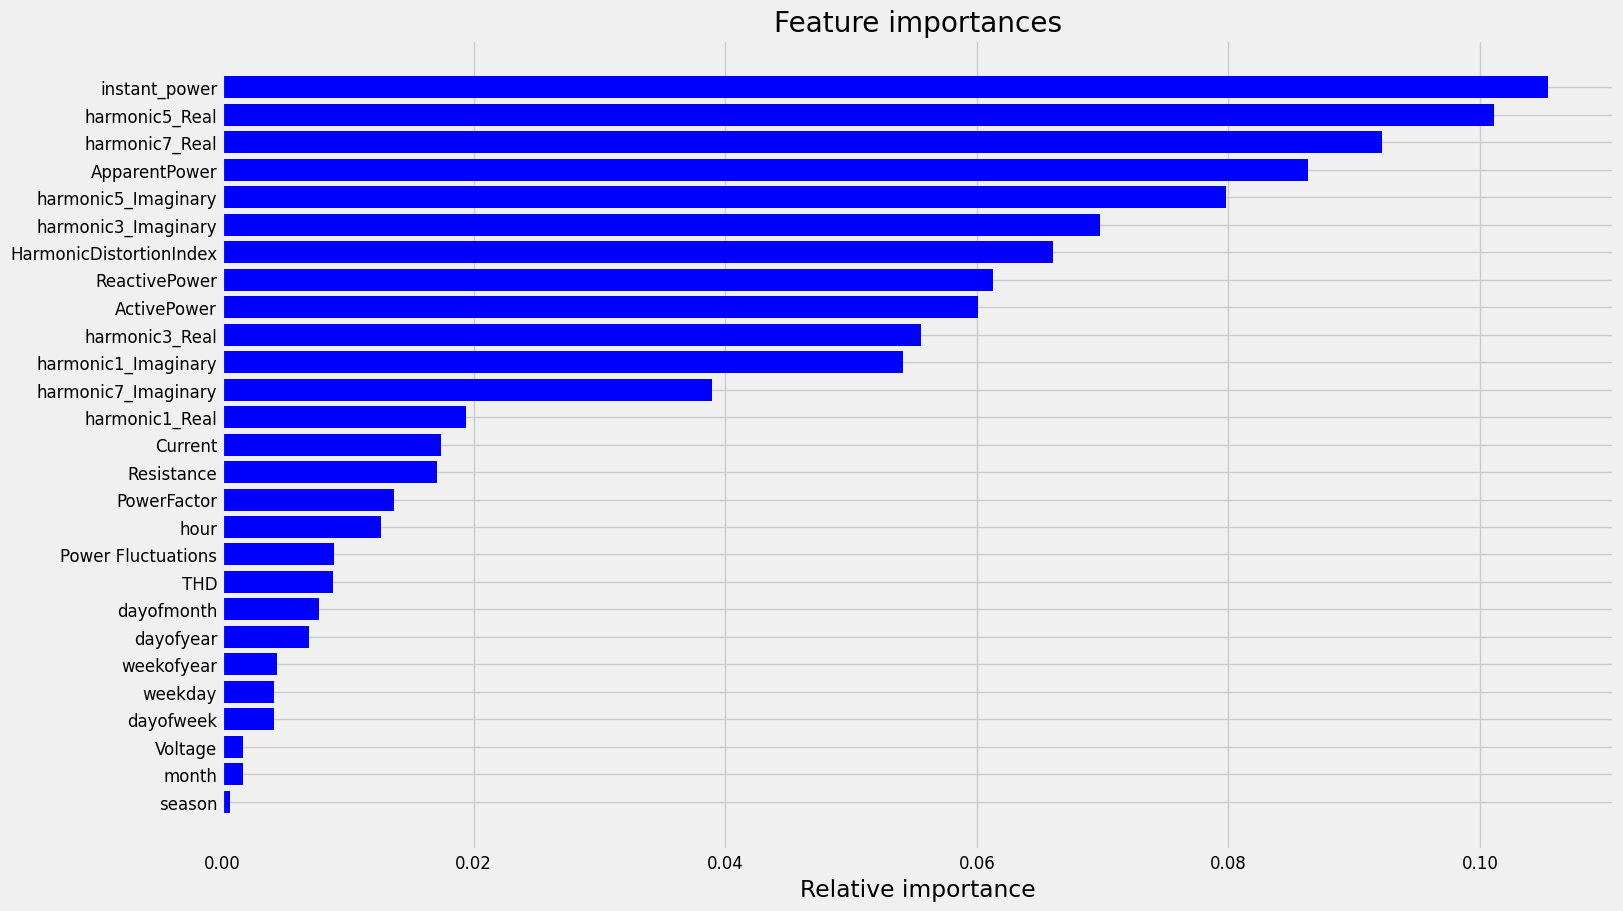

In [85]:
# features = x_analysis.columns
features = x_analysis.columns
importances = clf_frst.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()